In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nn_robust_attacks.setup_mnist import MNIST, MNISTModel

Using TensorFlow backend.


In [2]:
sess = tf.Session(config=tf.ConfigProto())
K.set_session(sess)

data = MNIST()

class MNIST_Model:
    def __init__(self, session=None):
        self.num_channels = 1
        self.image_size = 28
        self.num_labels = 10

        model = Sequential()

        model.add(Conv2D(32, (3, 3),
                         input_shape=(28, 28, 1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(10))

        self.model = model

    def predict(self, data):
        return self.model(data)

In [3]:
num_epochs = 10
batch_size = 128
train_temp = 1

training = False

In [4]:
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                   logits=predicted/train_temp)

# Train first model 
modelname = "models/trained_model1"
model1 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model1.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model1.model.save(modelname)
    
else:
    model1.model = load_model(modelname, custom_objects={'fn':fn})
        
model1.model.summary()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
___________________________________________________________

In [5]:
# Train second model 
modelname = "models/trained_model2"
model2 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model2.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model2.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model2.model.save(modelname)
    
else:
    model2.model = load_model(modelname, custom_objects={'fn':fn})
    
model2.model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_55 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_56 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_57 (Activation)   (None, 10, 10, 64)      

In [6]:
# Train third model 
modelname = "models/trained_model3"
model3 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model3.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model3.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model3.model.save(modelname)
    
else:
    model3.model = load_model(modelname, custom_objects={'fn':fn})
    
model3.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_39 (Activation)   (None, 10, 10, 64)       

In [7]:
# Train fourth model 
modelname = "models/trained_model4"
model4 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model4.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model4.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model4.model.save(modelname)
    
else:
    model4.model = load_model(modelname, custom_objects={'fn':fn})
    
model4.model.summary()

In [24]:
# Train fifth model 
modelname = "models/trained_model5"
model5 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model5.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model5.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model5.model.save(modelname)
    
else:
    model5.model = load_model(modelname, custom_objects={'fn':fn})
    
model5.model.summary()

/home/zainkhan/.local/share/virtualenvs/xu-jXQ59E2g/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 36s 652us/step - loss: 0.4375 - accuracy: 0.8650 - val_loss: 0.0846 - val_accuracy: 0.9738
Epoch 2/10
55000/55000 [==============================] - 35s 638us/step - loss: 0.0683 - accuracy: 0.9786 - val_loss: 0.0595 - val_accuracy: 0.9818
Epoch 3/10
55000/55000 [==============================] - 43s 784us/step - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.0475 - val_accuracy: 0.9864
Epoch 4/10
55000/55000 [==============================] - 35s 637us/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.0449 - val_accuracy: 0.9864
Epoch 5/10
55000/55000 [==============================] - 35s 639us/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0438 - val_accuracy: 0.9866
Epoch 6/10
55000/55000 [==============================] - 35s 639us/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0451 - val_accuracy: 0.9884
Epoch 7/10
55000/55000 [==============================] -

In [27]:
# Train sixth model 
modelname = "models/trained_model6"
model6 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model6.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model6.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    
    model6.model.save(modelname)
    
else:
    model6.model = load_model(modelname, custom_objects={'fn':fn})
    
model6.model.summary()

/home/zainkhan/.local/share/virtualenvs/xu-jXQ59E2g/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 36s 648us/step - loss: 0.5181 - accuracy: 0.8346 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 2/10
55000/55000 [==============================] - 35s 638us/step - loss: 0.0708 - accuracy: 0.9777 - val_loss: 0.0621 - val_accuracy: 0.9824
Epoch 3/10
55000/55000 [==============================] - 35s 636us/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0545 - val_accuracy: 0.9848
Epoch 4/10
55000/55000 [==============================] - 35s 637us/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0432 - val_accuracy: 0.9880
Epoch 5/10
55000/55000 [==============================] - 35s 639us/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0447 - val_accuracy: 0.9884
Epoch 6/10
55000/55000 [==============================] - 35s 639us/step - loss: 0.0236 - accuracy: 0.9920 - val_loss: 0.0390 - val_accuracy: 0.9890
Epoch 7/10
55000/55000 [==============================] -

In [8]:
from keras.datasets import mnist as data_keras
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = data_keras.load_data()
x_train = x_train[...,np.newaxis] /255.0
x_test = x_test[...,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
# Performance of first model
scores = model1.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

# Performance of second model
scores = model2.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

# Performance of third model
scores = model3.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

# Performance of fourth model
scores = model4.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

# Performance of fifth model
scores = model5.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

# Performance of sixth model
scores = model6.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

10000/10000 [==============================] - 2s 202us/step
loss=0.060424025029380574, accuracy=0.9833999872207642
10000/10000 [==============================] - 2s 192us/step
loss=0.14029382344670593, accuracy=0.9559999704360962
10000/10000 [==============================] - 2s 197us/step
loss=0.1604284207782708, accuracy=0.9513999819755554
10000/10000 [==============================] - 2s 200us/step
loss=0.06374289788251045, accuracy=0.979200005531311
10000/10000 [==============================] - 2s 199us/step
loss=0.1024473569555208, accuracy=0.9670000076293945
10000/10000 [==============================] - 2s 198us/step
loss=0.12785435293135233, accuracy=0.9595999717712402


In [10]:
test_size = 250
num_img = test_size // 10
trial_data = []
indicies = []

for i in range(0, 10):
    trial_data.append([])
    indicies.append([])
    for idx, img in enumerate(data.test_data):
        if np.nonzero(data.test_labels[idx])[0][0] == i:
            trial_data[i].append(data.test_data[idx])
            indicies[i].append(idx)
        if len(trial_data[i]) >= num_img:
            break

In [11]:
import random
target_data = []

for i in range(0, 10):
    target_data.append([])
    for j in range(0, int(num_img)):
        numbers = list(range(0, i)) + list(range(i + 1, 10))
        r = random.choice(numbers)
        target_data[i].append(r)

target_labels = []
for i in range(0, 10):
    target_labels.append(to_categorical(target_data[i]))

In [12]:
plt.set_cmap('Greys_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
true_label = 0
#inputs = np.asarray(trial_data[true_label])
#targets = target_labels[true_label]

targets = np.array([to_categorical(9)])
for i in range(0, num_img - 1):
    targets = np.vstack([targets, np.array(to_categorical(9))])

In [14]:
#targets = np.load('targets_0.csv.npy')
inputs = np.load('inputs_0.csv.npy')

In [15]:
from nn_robust_attacks.l2_attack_tri import CarliniL2

adv = CarliniL2(sess, model1, model2, model3).attack(inputs, targets)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

go up to 25
tick 0
[10000000000.0]
0 (0.043152444, 0.017142495, 0.0041285073)
1000 (0.03922678, 0.017249895, 2.0019474e-05)
2000 (0.039236493, 0.017248344, 3.234579e-05)
[10000000000.0]
0 (0.39440468, 0.17141984, 0.004175713)
1000 (0.39032498, 0.17040783, 0.0021719919)
2000 (0.3903252, 0.17045255, 0.002120975)
[10000000000.0]
0 (3.9064605, 1.7141917, 0.0041809315)
1000 (3.6977599, 1.4907293, 0.21950853)
2000 (3.6977258, 1.4938778, 0.21754563)
[10000000000.0]
0 (39.026966, 17.141909, 0.0041814726)
1000 (11.291908, 0.0, 11.2313385)
2000 (11.30395, 0.0, 11.202785)
[11.128836]
0 (21.466715, 9.428052, 0.0041814214)
1000 (11.219787, 0.0544267, 8.85164)
2000 (11.213367, 0.053397723, 8.837575)
3000 (11.207996, 0.057002883, 8.849121)
4000 (11.205105, 0.037849873, 8.86116)
[8.870075]
0 (12.686586, 5.571121, 0.004181344)
1000 (9.560707, 2.0101385, 3.7262344)
2000 (9.501265, 1.6964233, 3.8847313)
3000 

In [16]:
from numpy import savetxt

np.save('inputs_tri_' + str(true_label) + '.csv', inputs)
np.save('adv_tri_' + str(true_label) + '.csv', adv)
np.save('targets_tri_' + str(true_label) + '.csv', targets)

Valid:


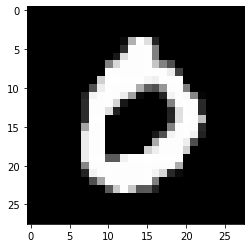

In [17]:
print("Valid:")
plt.imshow(inputs[0][:,:,0])

Adversarial:


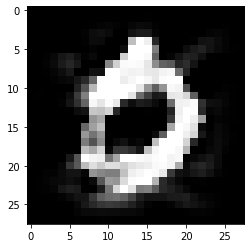

In [18]:
print("Adversarial:")
plt.imshow(adv[0][:,:,0])

Perturbation


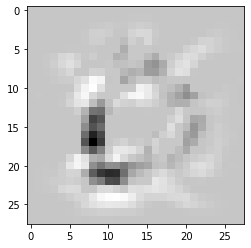

In [19]:
print('Perturbation')
plt.imshow(adv[0][:,:,0] - inputs[0][:,:,0])

In [20]:
def get_label_confidence(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    pr = pr / np.sum(pr)
    image_class = model.predict_classes(image)
    return 'Predicted {} : {:.7f}'.format(image_class[0], max(max(pr)))

In [21]:
for i in range(0, num_img):
    print(i)
    print('Model 1', get_label_confidence(adv[i][np.newaxis, ...], model1.model))
    print('Model 2', get_label_confidence(adv[i][np.newaxis, ...], model2.model))
    print('Model 3', get_label_confidence(adv[i][np.newaxis, ...], model3.model))

0

Model 1 Predicted 9 : 0.2748632
Model 2 Predicted 9 : 0.2781032
Model 3 Predicted 0 : 0.9488509
1
Model 1 Predicted 9 : 0.3509947
Model 2 Predicted 9 : 0.3436402
Model 3 Predicted 0 : 0.7343668
2
Model 1 Predicted 9 : 0.3459896
Model 2 Predicted 9 : 0.4393218
Model 3 Predicted 0 : 0.8888412
3
Model 1 Predicted 9 : 0.3966465
Model 2 Predicted 0 : 0.7832109
Model 3 Predicted 0 : 0.9750934
4
Model 1 Predicted 9 : 0.2618844
Model 2 Predicted 0 : 0.4013896
Model 3 Predicted 0 : 0.9068822
5
Model 1 Predicted 9 : 0.5111811
Model 2 Predicted 9 : 0.4796142
Model 3 Predicted 0 : 0.9087945
6
Model 1 Predicted 9 : 0.4854451
Model 2 Predicted 0 : 0.9907546
Model 3 Predicted 0 : 0.9673081
7
Model 1 Predicted 9 : 0.5340796
Model 2 Predicted 9 : 0.5455490
Model 3 Predicted 0 : 0.9923419
8
Model 1 Predicted 9 : 0.3572369
Model 2 Predicted 0 : 0.3785561
Model 3 Predicted 0 : 0.4922773
9
Model 1 Predicted 9 : 0.5051016
Model 2 Predicted 9 : 0.5277202
Model 3 Predicted 0 : 0.9959436
10
Model 1 Predicte

In [22]:
perturb = adv - inputs
perturb_mean =  np.sum(perturb) / num_img 
perturb_std = np.std(np.array([sum(x) for x in perturb]))
print('Mean', perturb_mean)
print('Standard Deviation', perturb_std)

Mean 5.08387939453125
Standard Deviation 0.9281273


In [23]:
# Transferability test
for i in range(0, num_img):
    print(i)
    print('Model 4', get_label_confidence(adv[i][np.newaxis, ...], model4.model))

0
Model 4 Predicted 9 : 0.6268160
1
Model 4 Predicted 0 : 0.3467971
2
Model 4 Predicted 9 : 0.7721281
3
Model 4 Predicted 0 : 0.9433358
4
Model 4 Predicted 3 : 0.9413667
5
Model 4 Predicted 2 : 0.5513410
6
Model 4 Predicted 0 : 0.9828698
7
Model 4 Predicted 0 : 0.9836392
8
Model 4 Predicted 0 : 0.8415120
9
Model 4 Predicted 0 : 0.9902375
10
Model 4 Predicted 5 : 0.4615895
11
Model 4 Predicted 0 : 0.6847674
12
Model 4 Predicted 0 : 0.5981404
13
Model 4 Predicted 0 : 0.9365160
14
Model 4 Predicted 0 : 0.8772315
15
Model 4 Predicted 0 : 0.8601555
16
Model 4 Predicted 9 : 0.4153365
17
Model 4 Predicted 0 : 0.7193800
18
Model 4 Predicted 0 : 0.9815810
19
Model 4 Predicted 0 : 0.9801328
20
Model 4 Predicted 0 : 0.9890976
21
Model 4 Predicted 5 : 0.7011885
22
Model 4 Predicted 0 : 0.9400018
23
Model 4 Predicted 0 : 0.6064667
24
Model 4 Predicted 0 : 0.5276427
